# MATH 189 Project 3
## Group 2, Winter 2021

Members:
- Kasen Teoh
- Chung En Pan
- Nathan Fallahi
- Parsa Ganjooi
- Eamon Jarrett-Mann

# Introduction

The past year has brought the danger of viruses to the forefront of people’s thoughts. Even if there are vaccines or treatments for certain viruses, mutations in a viruses’ genetic code can render these less effective. The human CMV (Cytomegalovirus) is a life threatening disease to those who suffer from suppressed and deficient immune systems. In order to combat the virus, knowledge of how the virus replicates itself is extremely essential. Each time the virus replicates, a part of the original virus cell’s DNA is replicated. Since the virus reproduces through replication, there are patterns and palindromes in the DNA which may hint at the site of replication and by identifying the site, scientists may be able to reduce or inhibit the virus from replicating. In order to find the origin of replication, we analyze the DNA, looking for any clusters and unusual clusters of palindromes. Upon the completion of this project, we would be able to inform scientists of the possible replication sites within the human CMV DNA. 

**Big question:** Find the replication site of the herpes CMV virus.
1. **Simulate a random scatter** that corresponds to the locations of the palindromes on the DNA strand. Keep in mind the length and structure of our data. you will need to be able to generate a number of random scatters.
2. **Focus on locations and spacings.** Compare the observed distribution of location and spacings to the theoretical one coming from the random scatter. Use at least one simulation based test, and at least one graphical tool, and at least one formal hypothesis test. For locations consider and investigate at least consecutive pairs and triplets.
3. **Focus on counts**. Use graphical methods and more formal hypothesis tests to examine the counts of palindromes in the various regions of the DNA and compare the distribution of the observed to the one obtained from the random scatter. Split the DNA into non overlapping regions of equal length to do so. Vary the length choses (at least two choices) and perform sensitivity analysis (do the answers change when you change the length of the intervals; be cautious not to use too small or too big choices of length) . Consider at least one way to classify the regions according to their number of counts.
4. **Study the biggest cluster.** Does the interval with the greatest number of palindromes indicate a potential origin of replication? Perform a formal statistical test and propose at least one test of your own (graphical, simulation based, or formal). This last component is your independent question for Project 3.

# Data

We used the file labeled hcmv.txt to look at the data. For the data we looked at palindromes that were at least 10 letters long with the longest one being 18 letters. We ignored anything that had less than 10 letters. The CMV DNA data that we looked at was 229353 letters long. Our data set has locations of 296 palindromes. The location can be anywhere from 1 to 229353 so the data is discrete. Our goal is to look at the data set to see if there are a lot of palindromes clustered close together. We are looking at the data given to us and we also need to simulate data in order to compare. To figure this out we'll be looking at 3 things which are location of palindromes, the distance between palindromes, and the number of palindromes per interval. These three things are used to identify a cluster, but for our question we are looking for the unusual clusters. The first step to organize the data would be to make intervals and within the interval we would count the number of palindromes in each interval. If you look at the data you can see at the 93000 and 195000 pairs of DNA you can notice a huge cluster of palindromes which does not depend on how large or small our intervals are. This shows us that these two locations are not due to chance. Next we would look at how many intervals there are with a certain number of palindromes in it. This is easy to see on a histogram because it is used as a density estimator. We use the same test statistic on both the observed data and the data we simulated. 

In [1]:
# imports and setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import math
import random
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import chisquare
from scipy.stats import chi2

pd.options.display.float_format = "{:,.3f}".format

sns.set()
sns.set_context('talk')

# this might be useful for cleaning the final submission
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
data = np.loadtxt("hcmv.txt", delimiter="\n", skiprows=1)

# Background

DNA is what makes every living thing different and unique. DNA is the code within every organism that contains the process of life and how to continue surviving. Within viruses, a part of the original virus cell’s DNA is snipped off and then split open. Because DNA is composed of A, C, G, and T’s, the virus now has two half strands of DNA. The virus’ free nucleotides then join to these two half strands and now form two full DNA strands. The location of where the DNA is snipped off is essential to studying how to fight the virus and ultimately stop the virus from replicating and spreading throughout the immune system. 

Without DNA, humans and other organisms would not exist. DNA is what gives people the specific traits that we experience everyday. Researchers are able to get conclusions purely off the gene sequence. With new technology it is also becoming easier to see the gene mapping and draw conclusions from that. This article does talk about how in 1996 when chip technology came out it made reading DNA a lot easier. The science behind all this is still growing today. On top of all this the article does also talk about how it is very rare today to see genes be cloned by digesting DNA restriction enzymes because of a new one step process that has been discovered (Leach, 1997). 

CMV is of the Herpesviralus genus. For other members of this genus, such as the Herpes simplex virus (HSV), past research has shown connection to large clusters of DNA palindromes and origin of replication sequences (Lockshon & Galloway 1998). At the replication site, the DNA is split and forms two new DNA strands. Hence, there is a pattern at these sites, a palindrome in the DNA sequence. A palindrome is a sequence where it is the same forward and in reverse, for instance, ACGTTGCA. Therefore, in general, replication origins in DNA are considered major sites for regulating genome replication (Leung et al. 2005). However, a palindrome does not always represent a replication site. Due to the DNA sequence consisting of only four letters and the length of DNA, palindromes are bound to occur by random chance: statistically, palindromes are expected to occur half as often as non-palindromic sequences in double-stranded DNA (Lamprea-Burgunder et al., 2011). Consequently, we want to study the unusual occurrences of long palindromes to ensure we do not include the palindromes of random chance. 

In particular, we want to study the Cytomegalovirus (CMV). Congenital CMV is a major cause of disability in children, with little evidence for change in disease burden over time in high- and middle-income countries despite large scientific and clinical advances in the CMV field (Manicklal et al., 2013). Most human CMV infections are asymptomatic or display minor symptoms. As a result, the CMV infection may go unnoticed in the human body and spread. While the CMV virus can lay dormant in a host, it becomes harmful when it enters the reproductive cycle, where it is able to replicate countless copies of itself. An untreated CMV infection can lead to a general infection with the involvement of viruses such as herpes and colitis and may be transmitted to the fetus and/or child (Schottstedt et al., 2010). 

# Investigation

## Question 1

*Simulate a random scatter that corresponds to the locations of the palindroms on the DNA strand. Keep in mind the length and structure of our data. you will need to be able to generate a number of random scatters.*

Below, we see the histograms for 3 random scatters that correspond to the locations of the palindromes on the DNA strand. We see that distributions of palindrome locations for the simulated data are roughly the same. Hence, we choose one of the random samples to use as a comparison when carrying out our statistical and graphical tests.

In [3]:
uni_sample = []
for i in range(100):
    uni_sample.append(random.choices(range(1, 229354), k = len(data))) # sampling with replacement so its uniform

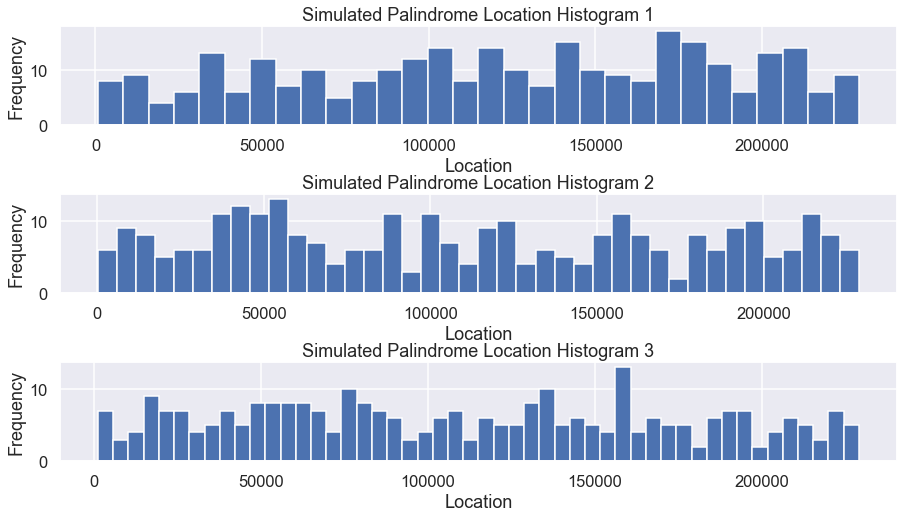

In [4]:
fig, axes = plt.subplots(3, 1, figsize = (15, 8))
plt.subplots_adjust(hspace = 0.7)

for i in range(3):
    axes[i].hist(uni_sample[i], bins=(i+3)*10)
    axes[i].set_title(f'Simulated Palindrome Location Histogram {i+1}')
    axes[i].set_xlabel('Location')
    axes[i].set_ylabel('Frequency')

plt.show()

## Question 2

*Focus on locations and spacings. Compare the observed distribution of location and spacings to the theoretical one coming from the random scatter. Use at least one simulation based test, and at least one graphical tool, and at least one formal hypothesis test. For locations consider and investigate at least consecutive pairs and triplets.*

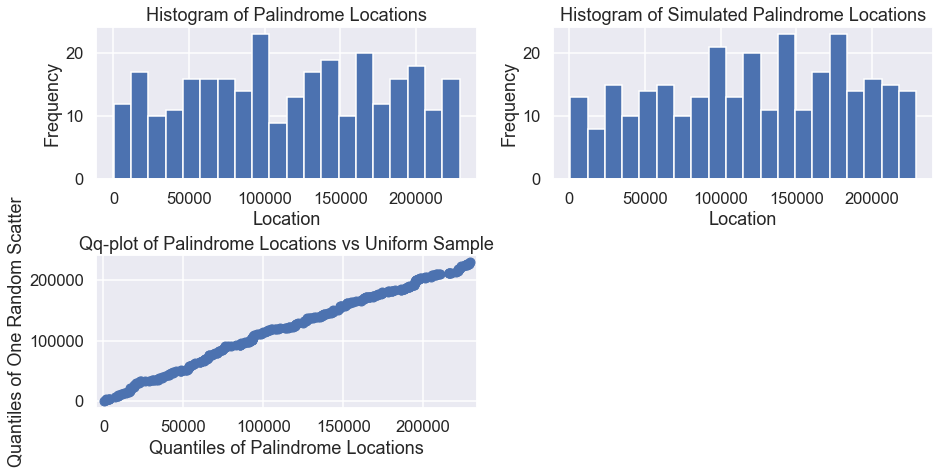

In [5]:
fig, axes = plt.subplots(2, 2, figsize = (15, 7))
plt.subplots_adjust(hspace=0.5)

axes[0][0].hist(data, bins = 20)
axes[0][0].set_title('Histogram of Palindrome Locations')
axes[0][0].set_xlabel('Location')
axes[0][0].set_ylabel('Frequency')

axes[0][1].hist(uni_sample[0], bins = 20)
axes[0][1].set_title('Histogram of Simulated Palindrome Locations')
axes[0][1].set_xlabel('Location')
axes[0][1].set_ylabel('Frequency')

pp_y = sm.ProbPlot(data);
pp_x = sm.ProbPlot(np.array(uni_sample[0]));
qqplot_2samples(pp_x, pp_y, ax = axes[1][0])
axes[1][0].set_title('Qq-plot of Palindrome Locations vs Uniform Sample')
axes[1][0].set_xlabel('Quantiles of Palindrome Locations')
axes[1][0].set_ylabel('Quantiles of One Random Scatter')

axes[1][1].remove()
plt.show()

The three graphical distributions above show that the two samples are roughly the same in distribution which supports the thinking that the palindrome locations are random. However, from the two histograms, we see that the original data has a few peaks where there are more frequencies.

In [6]:
def consec(data):
    count = []
    for i in range(len(data) - 1):
        count.append(abs(data[i + 1] - data[i]))
    return count

def pair(data):
    count = []
    for i in range(0, len(data) - 2, 2):
        count.append(abs(data[i + 2] - data[i]))
    return count

def triple(data):
    count = []
    for i in range(0, len(data) - 3, 3):
        count.append(abs(data[i + 3] - data[i]))
    return count

def pair_no(data):
    count = []
    for i in range(0, len(data) - 2, 2):
        count.append(abs(data[i + 2] - data[i]))
    return count

def triple_no(data):
    count = []
    for i in range(0, len(data) - 3, 3):
        count.append(abs(data[i + 3] - data[i]))
    return count

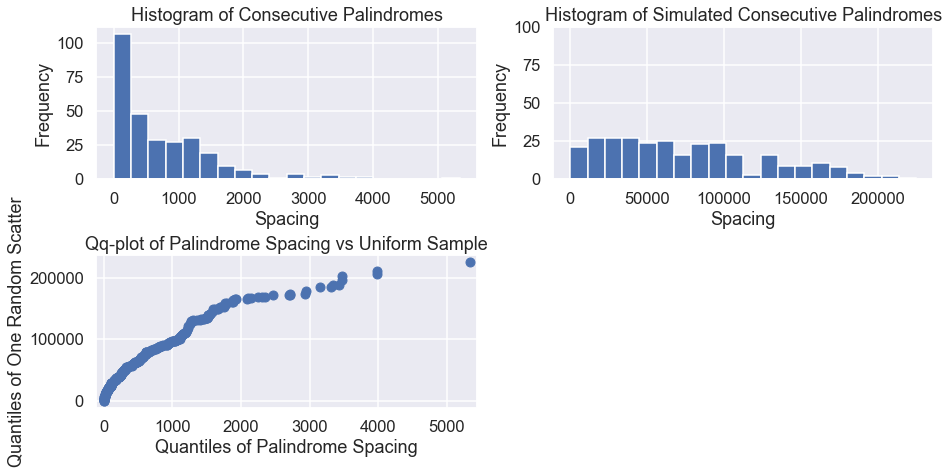

In [7]:
one = consec(data)
one_sim = consec(uni_sample[0])

fig, axes = plt.subplots(2, 2, figsize = (15, 7))
plt.subplots_adjust(hspace=0.5)

axes[0][0].hist(one, bins = 20)
axes[0][0].set_title('Histogram of Consecutive Palindromes')
axes[0][0].set_xlabel('Spacing')
axes[0][0].set_ylabel('Frequency')
axes[0][0].set_yticks(range(0, 101, 25))

axes[0][1].hist(one_sim, bins = 20)
axes[0][1].set_title('Histogram of Simulated Consecutive Palindromes')
axes[0][1].set_xlabel('Spacing')
axes[0][1].set_ylabel('Frequency')
axes[0][1].set_yticks(range(0, 101, 25))

pp_y = sm.ProbPlot(np.array(one));
pp_x = sm.ProbPlot(np.array(one_sim));
qqplot_2samples(pp_x, pp_y, ax = axes[1][0])
axes[1][0].set_title('Qq-plot of Palindrome Spacing vs Uniform Sample')
axes[1][0].set_xlabel('Quantiles of Palindrome Spacing')
axes[1][0].set_ylabel('Quantiles of One Random Scatter')

axes[1][1].remove()
plt.show()

Visualizing the spacings between the original and simulated data, we see that in consecutive palindromes there are many more palindromes with only a few spaces between them. Additionally, in the quantile-quantile plot, we see that as the quantile grows, the spacing between the points becomes more evident. Hence, this leads us to believe that the two data sets do not have the same distribution.

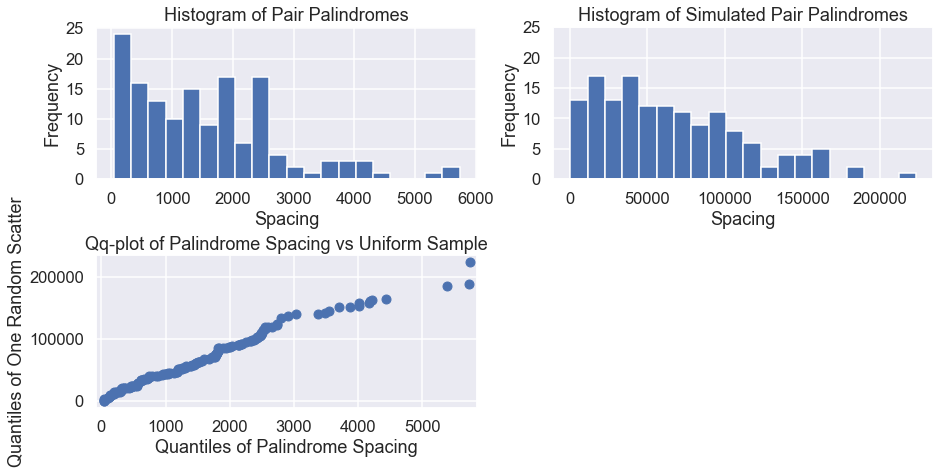

In [8]:
two = pair(data)
two_sim = pair(uni_sample[0])

fig, axes = plt.subplots(2, 2, figsize = (15, 7))
plt.subplots_adjust(hspace=0.5)

axes[0][0].hist(two, bins = 20)
axes[0][0].set_title('Histogram of Pair Palindromes')
axes[0][0].set_xlabel('Spacing')
axes[0][0].set_ylabel('Frequency')
axes[0][0].set_yticks(range(0, 30, 5))

axes[0][1].hist(two_sim, bins = 20)
axes[0][1].set_title('Histogram of Simulated Pair Palindromes')
axes[0][1].set_xlabel('Spacing')
axes[0][1].set_ylabel('Frequency')
axes[0][1].set_yticks(range(0, 30, 5))

pp_y = sm.ProbPlot(np.array(two));
pp_x = sm.ProbPlot(np.array(two_sim));
qqplot_2samples(pp_x, pp_y, ax = axes[1][0])
axes[1][0].set_title('Qq-plot of Palindrome Spacing vs Uniform Sample')
axes[1][0].set_xlabel('Quantiles of Palindrome Spacing')
axes[1][0].set_ylabel('Quantiles of One Random Scatter')

axes[1][1].remove()
plt.show()

Similarly to consecutive palindromes, we once again see that there is a large number of palindromes that has very few spacings in between them and less with larger spacings. In the simulated data, we see that there are a few pair of palindromes with ten thousands and even hundred thousands of spacings in between. Once again, the qq-plot is more spread out and further strengthening out hypothesis that the two data sets are not of the same distribution. 

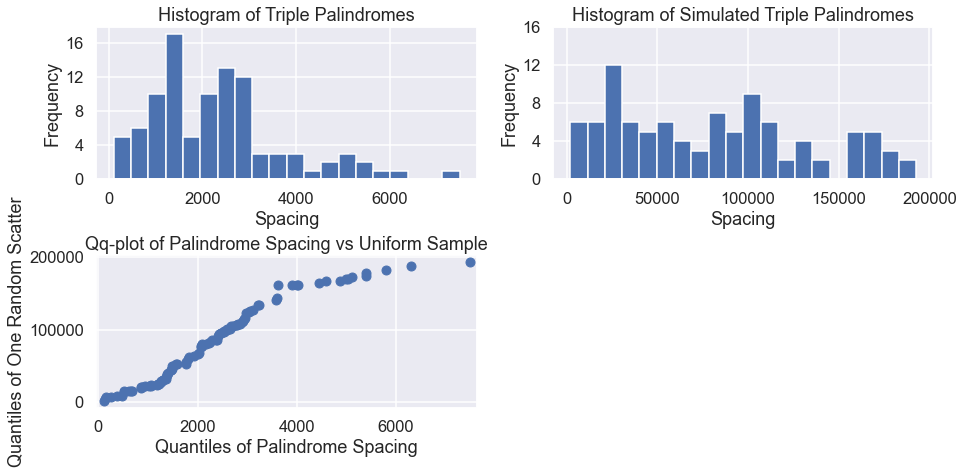

In [9]:
three = triple(data)
three_sim = triple(uni_sample[0])

fig, axes = plt.subplots(2, 2, figsize = (15, 7))
plt.subplots_adjust(hspace=0.5)

axes[0][0].hist(three, bins = 20)
axes[0][0].set_title('Histogram of Triple Palindromes')
axes[0][0].set_xlabel('Spacing')
axes[0][0].set_ylabel('Frequency')
axes[0][0].set_yticks(range(0, 20, 4))

axes[0][1].hist(three_sim, bins = 20)
axes[0][1].set_title('Histogram of Simulated Triple Palindromes')
axes[0][1].set_xlabel('Spacing')
axes[0][1].set_ylabel('Frequency')
axes[0][1].set_yticks(range(0, 20, 4))

pp_y = sm.ProbPlot(np.array(three));
pp_x = sm.ProbPlot(np.array(three_sim));
qqplot_2samples(pp_x, pp_y, ax = axes[1][0])
axes[1][0].set_title('Qq-plot of Palindrome Spacing vs Uniform Sample')
axes[1][0].set_xlabel('Quantiles of Palindrome Spacing')
axes[1][0].set_ylabel('Quantiles of One Random Scatter')

axes[1][1].remove()
plt.show()

The above histograms all show that there are constantly more palindromes in the original data that have smaller spaces in between each other while the simulated data has larger spacings. As for the qq-plots, aside from the location of the palindromes, we see that when plotting the spacings between the palindromes against the spacings in the simulated data, we arrive at the hypothesis that the two do not follow the same distribution. 

Comparing the two data sets, there are many palindromes with small spacings in between them in the original data set, which is to be expected because our alphabet only consists of four letters (A, T, C, and G). 

Location of Palindromes
<br>$H_0: $ The location of the palindromes follow a uniform distribution
<br>$H_A: $ The location of the palindromes do not follow a uniform distribution

Consecutive Palindromes
<br>$H_0: $ The spacing of consecutive palindromes follow an exponential distribution
<br>$H_A: $ The spacing of consecutive palindromes do not follow an exponential distribution

Consecutive Pair Palindromes
<br>$H_0: $ The spacing of consecutive pairs palindromes follow a gamma distribution
<br>$H_A: $ The spacing of consecutive pairs palindromes do not follow a gamma distribution

Consecutive Triple Palindromes
<br>$H_0: $ The spacing of consecutive triple palindromes follow a gamma distribution
<br>$H_A: $ The spacing of consecutive triple palindromes do not follow a gamma distribution

In [10]:
bins = 20
exp_value = len(data) / bins
p = 0.95
alpha = 1 - p
df = bins - 1

observed, edges = np.histogram(data, bins)
test_stat, p = chisquare(observed, exp_value)
chi_quantile = chi2.ppf(p, df)
p = '{:0.2e}'.format(p)

temp = {'Parameter': ['# of Palindromes = ' + str(exp_value)], 'Test Statistic': [test_stat], '95% Quantile': [chi_quantile], 'Degrees of Freedom': df, 'P-Value': [p], 'Alpha': [alpha]}
result = pd.DataFrame(temp, index = ['Location of Palindrome'])



num_bin = 50
df = num_bin - 1 - 1
num_dist = 295

observed, edges = np.histogram(one, num_bin) #counting the number of differences in each bin
bin_len = edges[1] - edges[0]

cval = .95
lam = 1 / (np.array(one).mean())

exp_dist = np.array([]) # 1 - e ^ -lambda * bin
for i in range(1, num_bin + 1):
    prob = 1 - math.pow(math.e,-lam * i * bin_len) - (1 - math.pow(math.e, -lam * (i - 1) * bin_len))
    prob *= num_dist
    exp_dist = np.append(exp_dist, prob)

test_stat, p = chisquare(observed, exp_dist) 
chi_quantile = chi2.ppf(cval, df)
p = '{:0.2e}'.format(p)

temp = {'Parameter': ['Lambda = ' + '{:0.2e}'.format(lam)], 'Test Statistic': [test_stat], '95% Quantile': [chi_quantile], 'Degrees of Freedom': df, 'P-Value': [p], 'Alpha': [alpha]}
temp = pd.DataFrame(temp, index = ['Distance of Consecutive Palindromes'])
result = result.append(temp)



two_no = pair_no(data) #Non overlapping pairs
observed, edges = np.histogram(two_no, num_bin) #counting the number of differences in each bin
bin_len = edges[1] - edges[0]

cval = .95
lam = 1 / (np.array(two_no).mean())

exp_dist = np.array([]) # 1 - e ^ -lambda * bin
for i in range(1, num_bin + 1):
    prob = 1 - math.pow(math.e,-lam * i * bin_len) - (1 - math.pow(math.e, -lam * (i - 1) * bin_len))
    prob *= num_dist
    exp_dist = np.append(exp_dist, prob)

test_stat, p = chisquare(observed, exp_dist) 
chi_quantile = chi2.ppf(cval, df)
p = '{:0.2e}'.format(p)

temp = {'Parameter': ['Lambda = ' + '{:0.2e}'.format(lam)], 'Test Statistic': [test_stat], '95% Quantile': [chi_quantile], 'Degrees of Freedom': df, 'P-Value': [p], 'Alpha': [alpha]}
temp = pd.DataFrame(temp, index = ['Distance of Consecutive Pair Palindromes'])
result = result.append(temp)



three_no = triple_no(data) #Non overlapping triplets
observed, edges = np.histogram(three_no, num_bin) #counting the number of differences in each bin
bin_len = edges[1] - edges[0]

cval = .95
lam = 1 / (np.array(three_no).mean())

exp_dist = np.array([]) # 1 - e ^ -lambda * bin
for i in range(1, num_bin + 1):
    prob = 1 - math.pow(math.e,-lam * i * bin_len) - (1 - math.pow(math.e, -lam * (i - 1) * bin_len))
    prob *= num_dist
    exp_dist = np.append(exp_dist, prob)

test_stat, p = chisquare(observed, exp_dist) 
chi_quantile = chi2.ppf(cval, df)
p = '{:0.2e}'.format(p)

temp = {'Parameter': ['Lambda = ' + '{:0.2e}'.format(lam)], 'Test Statistic': [test_stat], '95% Quantile': [chi_quantile], 'Degrees of Freedom': df, 'P-Value': [p], 'Alpha': [alpha]}
temp = pd.DataFrame(temp, index = ['Distance of Consecutive Triple Palindromes'])
result = result.append(temp)



print('Hypothesis tests for original data')
result

Hypothesis tests for original data


,Parameter,Test Statistic,95% Quantile,Degrees of Freedom,P-Value,Alpha
Location of Palindrome,# of Palindromes = 14.8,18.054,18.624,19,5.19e-01,0.050
Distance of Consecutive Palindromes,Lambda = 1.29e-03,102.210,65.171,48,1.29e-05,0.050
Distance of Consecutive Pair Palindromes,Lambda = 6.44e-04,112.176,65.171,48,7.35e-07,0.050
Distance of Consecutive Triple Palindromes,Lambda = 4.29e-04,146.304,65.171,48,1.27e-11,0.050


In the cell above, we see that we fail to reject the null when looking at the location of palindromes as the test statistic is less than that of the 95% chi-square quartile and the p-value is much greater than that of the alpha. This means that we have insufficient evidence to say that the location of the palindromes do not follow a uniform distribution, i.e the location of the palindromes in our data follow a uniform distribution. 

For the last three hypothesis tests, the three test statistics are greater than the 95% quantile and the p-value is less than that of the alpha. Hence, we are able to reject the null hypothesis in favor of the alternative. In other words, for consecutive palindromes, we have sufficient evidence to say that they do not follow an exponential distribution and for consecutive, pair, and triple palindromes, they do not follow a gamma distribution. 

Location of Palindromes
<br>$H_0: $ The location of the simulated palindromes follow a uniform distribution
<br>$H_A: $ The location of the simulated palindromes do not follow a uniform distribution

Consecutive Palindromes
<br>$H_0: $ The distance of the consecutive simulated palindromes follow an exponential distribution
<br>$H_A: $ The distance of the consecutive simulated palindromes do not follow an exponential distribution

Consecutive Pair Palindromes
<br>$H_0: $ The distance of the consecutive simulated pair palindromes follow a gamma distribution
<br>$H_A: $ The distance of the consecutive simulated pair palindromes do not follow a gamma distribution

Consecutive Triple Palindromes
<br>$H_0: $ The distance of the consecutive simulated triple palindromes follow a gamma distribution
<br>$H_A: $ The distance of the consecutive simulated triple palindromes do not follow a gamma distribution

In [11]:
bins = 20
exp_value = len(uni_sample[0]) / bins
p = 0.95
alpha = 1 - p
df = bins - 1

observed, edges = np.histogram(uni_sample[0], bins)
test_stat, p = chisquare(observed, exp_value)
chi_quantile = chi2.ppf(p, df)
p = '{:0.2e}'.format(p)

temp = {'Parameter': ['# of Palindromes = ' + str(exp_value)], 'Test Statistic': [test_stat], '95% Quantile': [chi_quantile], 'Degrees of Freedom': df, 'P-Value': [p], 'Alpha': [alpha]}
result = pd.DataFrame(temp, index = ['Location of Palindrome'])



num_bin = 50
df = num_bin - 1 - 1
num_dist = 295

observed, edges = np.histogram(one_sim, num_bin) #counting the number of differences in each bin
bin_len = edges[1] - edges[0]

cval = .95
lam = 1 / (np.array(one_sim).mean())

exp_dist = np.array([]) # 1 - e ^ -lambda * bin
for i in range(1, num_bin + 1):
    prob = 1 - math.pow(math.e,-lam * i * bin_len) - (1 - math.pow(math.e, -lam * (i - 1) * bin_len))
    prob *= num_dist
    exp_dist = np.append(exp_dist, prob)

test_stat, p = chisquare(observed, exp_dist) 
chi_quantile = chi2.ppf(cval, df)
p = '{:0.2e}'.format(p)

temp = {'Parameter': ['Lambda = ' + '{:0.2e}'.format(lam)], 'Test Statistic': [test_stat], '95% Quantile': [chi_quantile], 'Degrees of Freedom': df, 'P-Value': [p], 'Alpha': [alpha]}
temp = pd.DataFrame(temp, index = ['Distance of Simulated Consecutive Palindromes'])
result = result.append(temp)



two_sim_no = pair_no(uni_sample[0]) #Non overlapping pairs
observed, edges = np.histogram(two_sim_no, num_bin) #counting the number of differences in each bin
bin_len = edges[1] - edges[0]

cval = .95
lam = 1 / (np.array(two_sim_no).mean())

exp_dist = np.array([]) # 1 - e ^ -lambda * bin
for i in range(1, num_bin + 1):
    prob = 1 - math.pow(math.e,-lam * i * bin_len) - (1 - math.pow(math.e, -lam * (i - 1) * bin_len))
    prob *= num_dist
    exp_dist = np.append(exp_dist, prob)

test_stat, p = chisquare(observed, exp_dist) 
chi_quantile = chi2.ppf(cval, df)
p = '{:0.2e}'.format(p)

temp = {'Parameter': ['Lambda = ' + '{:0.2e}'.format(lam)], 'Test Statistic': [test_stat], '95% Quantile': [chi_quantile], 'Degrees of Freedom': df, 'P-Value': [p], 'Alpha': [alpha]}
temp = pd.DataFrame(temp, index = ['Distance of Simulated Consecutive Pair Palindromes'])
result = result.append(temp)



three_sim_no = triple_no(uni_sample[0]) #Non overlapping triplets
observed, edges = np.histogram(three_sim_no, num_bin) #counting the number of differences in each bin
bin_len = edges[1] - edges[0]

cval = .95
lam = 1 / (np.array(three_sim_no).mean())

exp_dist = np.array([]) # 1 - e ^ -lambda * bin
for i in range(1, num_bin + 1):
    prob = 1 - math.pow(math.e,-lam * i * bin_len) - (1 - math.pow(math.e, -lam * (i - 1) * bin_len))
    prob *= num_dist
    exp_dist = np.append(exp_dist, prob)

test_stat, p = chisquare(observed, exp_dist) 
chi_quantile = chi2.ppf(cval, df)
p = '{:0.2e}'.format(p)

temp = {'Parameter': ['Lambda = ' + '{:0.2e}'.format(lam)], 'Test Statistic': [test_stat], '95% Quantile': [chi_quantile], 'Degrees of Freedom': df, 'P-Value': [p], 'Alpha': [alpha]}
temp = pd.DataFrame(temp, index = ['Distance of Simulated Consecutive Triple Palindromes'])
result = result.append(temp)



print('Hypothesis tests for simulated data')
result

Hypothesis tests for simulated data


,Parameter,Test Statistic,95% Quantile,Degrees of Freedom,P-Value,Alpha
Location of Palindrome,# of Palindromes = 14.8,22.919,14.414,19,2.41e-01,0.050
Distance of Simulated Consecutive Palindromes,Lambda = 1.33e-05,90.979,65.171,48,2.53e-04,0.050
Distance of Simulated Consecutive Pair Palindromes,Lambda = 1.51e-05,95.761,65.171,48,7.37e-05,0.050
Distance of Simulated Consecutive Triple Palindromes,Lambda = 1.24e-05,140.210,65.171,48,1.00e-10,0.050


In [12]:
exp_dist

array([13.57047994, 12.94621578, 12.35066879, 11.78251794, 11.24050294,
       10.72342152, 10.23012668,  9.75952421,  9.31057022,  8.88226884,
        8.47367003,  8.08386742,  7.71199637,  7.35723199,  7.01878735,
        6.69591171,  6.38788888,  6.0940356 ,  5.81370004,  5.54626038,
        5.29112338,  5.0477231 ,  4.81551962,  4.59399789,  4.38266651,
        4.18105672,  3.98872131,  3.80523364,  3.6301867 ,  3.46319221,
        3.30387973,  3.15189589,  3.00690355,  2.86858109,  2.7366217 ,
        2.61073265,  2.4906347 ,  2.37606145,  2.26675876,  2.16248417,
        2.06300638,  1.96810473,  1.87756871,  1.79119749,  1.70879949,
        1.63019194,  1.55520046,  1.4836587 ,  1.41540799,  1.35029692])

In the cell above, we achieve the same results as the four hypothesis tests for the original data. We fail to reject the hypothesis test involving the location of palindromes, hence, it follows a uniform distribution.

On the other hand, the other three hypothesis tests, consecutive, consecutive pairs, and consecutive triples, we reject the null and so the three distance distributions do not follow an exponential, gamma, or gamma distribution, respectively. 

## Question 3

*Focus on counts. Use graphical methods and more formal hypothesis tests to examine the counts of palindromes in the various regions of the DNA and compare the distribution of the observed to the one obtained from the random scatter. Split the DNA into non overlapping regions of equal length to do so. Vary the length choses (at least two choices) and perform sensitivity analysis (do the answers change when you change the length of the intervals; be cautious not to use too small or too big choices of length). Consider at least one way to classify the regions according to their number of counts.*


In [13]:
num_bases = 229354
#print('We have: ' + str(len(data)) + " palindromes with " + str(num_bases) + ' bases')

In [14]:
factors = []
for i in range(1, num_bases+1):
    if num_bases%i==0:
        factors.append(i)

In [15]:
# factors
#We need equal length intervals

In [16]:
def construct_binned_counts(int_len, data, arbitrary_cutoff):
    """
    Gives you two dictionaries where keys are counts of palindrome occurence and values are number of intervals with that count
    arbitrary_cuttoff is where to stop looking at each bin individually and give >arbitrary_cutoff
    """
    intervals = list(range(0, 229355, int_len))
    counts = [0 for i in intervals]
    for i in range(len(intervals)):
        if i == 0:
            continue
        else:
            counts[i] = sum(np.logical_and(data>intervals[i-1], data<=intervals[i]))
    number, occ = np.unique(counts, return_counts = True)
    act = {n:o for n,o in zip(number,occ)}
    #act = pd.Series(occ, index = number, name = "site counts for " + str(int_len) + " interval")
    lambda_hat = len(data)/len(intervals)
    expected = {}
    pois = {}
    cdf = {}
    for i in act.keys():
        pois[i] = stats.poisson.pmf(i, mu = lambda_hat)
        E_v = len(intervals) * stats.poisson.pmf(i, mu = lambda_hat)
        expected[i] = E_v
        cdf[i] = stats.poisson.cdf(i, mu = lambda_hat)
    keys = list(act.keys())
    to_sum = []
    for i in keys:
        if i > arbitrary_cutoff:
            expected.pop(i)
            act.pop(i)
            cdf.pop(i)
        else:
            to_sum.append(i)
    expected[">" + str(arbitrary_cutoff)] = len(intervals) - sum([expected[i] for i in to_sum])
    act[">" + str(arbitrary_cutoff)] = len(intervals) - sum([act[i] for i in to_sum])
    cdf[">" + str(arbitrary_cutoff)] = 1
    return pd.Series(act), pd.Series(expected), pd.Series(cdf)

In [17]:
def chi_sq_hyp(act, expec, a):
    """
    Takes in actual and expecteds, gives us the
    """
    deg_free = len(act.keys()) - 2
    T = [((pow((act[i] - expec[i]), 2)/expec[i])) for i in act.keys()]
    if sum(T) > stats.chi2.ppf(1 - a, deg_free):
        return "Reject the null hypothesis"
    else:
        return 'Fail to reject the null hypothesis'

In [18]:
def cdf_to_labels(cdf):
    """
    """
    labels = {}
    for i in cdf.index:
        if cdf[i] > .99:
            labels[i] = 'highly likely'
        elif cdf[i] > .9:
            labels[i] = 'likely'
        elif cdf[i] > .8:
            labels[i] = 'possible'
        else:
            labels[i] = 'improbabable'
    return pd.Series(labels)

$H_0$: the number of palindromes in a given interval are ~poisson($\lambda$)

Where the maximum likelihood estimator $\hat{\lambda}$ =  $\frac{length\; of\; data} {length\; of\; intervals}$

$H_1:$ This is not the case (there is more clustering than one would expect from randomness alone)

In [19]:
interval_len = int(229354/82)
actual, expected, cdf = construct_binned_counts(interval_len, data, 7)
test_stat, p = stats.chisquare(actual, expected)
print('Test Statistic:', round(test_stat, 3))
print('P-value:', round(p, 3))
print('for intervals of length: ' + str(interval_len))
print(chi_sq_hyp(actual, expected,.05))
print('Classification by count')
cdf_to_labels(cdf)

Test Statistic: 3.029
P-value: 0.933
for intervals of length: 2797
Fail to reject the null hypothesis
Classification by count


0      improbabable
1      improbabable
2      improbabable
3      improbabable
4      improbabable
5          possible
6            likely
7            likely
>7    highly likely
dtype: object

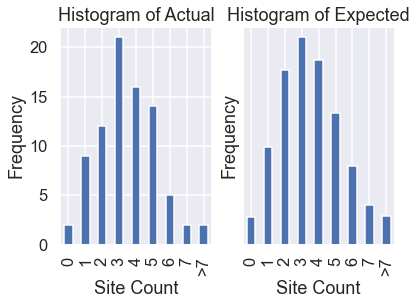

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.Series(actual).plot(kind = 'bar', ax=axes[0] )
pd.Series(expected).plot(kind = 'bar', ax=axes[1])
axes[0].set_title('Histogram of Actual')
axes[0].set_xlabel('Site Count')
axes[0].set_ylabel('Frequency')
axes[1].set_title('Histogram of Expected')
axes[1].set_xlabel('Site Count')
axes[1].set_ylabel('Frequency')
plt.yticks([])
plt.show()

As you can see from the graph above, the occurence of  site counts is not too different from what one would expect from poisson of lambda hat.

In [21]:
interval_len = int(229354/2797)
actual, expected, cdf = construct_binned_counts(interval_len, data, 7)
test_stat, p = stats.chisquare(actual, expected)
print('Test Statistic:', round(test_stat, 3))
print('P-value:', round(p, 3))
print('for intervals of length: ' + str(interval_len))
print(chi_sq_hyp(actual, expected,.05))
cdf_to_labels(cdf)

Test Statistic: 13.824
P-value: 0.008
for intervals of length: 82
Reject the null hypothesis


0          possible
1     highly likely
2     highly likely
3     highly likely
>7    highly likely
dtype: object

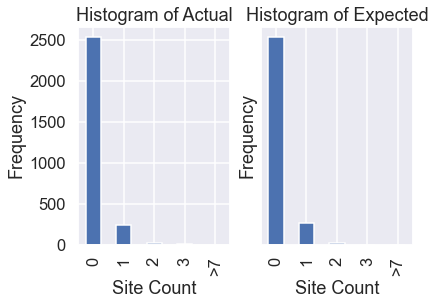

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.Series(actual).plot(kind = 'bar', ax=axes[0] )
pd.Series(expected).plot(kind = 'bar', ax=axes[1])
axes[0].set_title('Histogram of Actual')
axes[0].set_xlabel('Site Count')
axes[0].set_ylabel('Frequency')
axes[1].set_title('Histogram of Expected')
axes[1].set_xlabel('Site Count')
axes[1].set_ylabel('Frequency')
plt.yticks([])
plt.show()

As you can see from the graph above, the occurence of  site counts is not too different from what one would expect from poisson of lambda hat.

In [23]:
interval_len = int(229354/41)
actual, expected, cdf = construct_binned_counts(interval_len, data, 19)
test_stat, p = stats.chisquare(actual, expected)
print('Test Statistic:', round(test_stat, 3))
print('P-value:', round(p, 3))
print('for intervals of length: ' + str(interval_len))
print(chi_sq_hyp(actual, expected,.05))
cdf_to_labels(cdf)

Test Statistic: 290.637
P-value: 0.0
for intervals of length: 5594
Reject the null hypothesis


0       improbabable
2       improbabable
3       improbabable
4       improbabable
5       improbabable
6       improbabable
7       improbabable
8       improbabable
9           possible
10          possible
11            likely
14     highly likely
19     highly likely
>19    highly likely
dtype: object

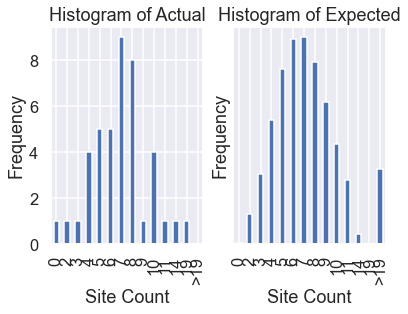

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.Series(actual).plot(kind = 'bar', ax=axes[0] )
pd.Series(expected).plot(kind = 'bar', ax=axes[1])
axes[0].set_title('Histogram of Actual')
axes[0].set_xlabel('Site Count')
axes[0].set_ylabel('Frequency')
axes[1].set_title('Histogram of Expected')
axes[1].set_xlabel('Site Count')
axes[1].set_ylabel('Frequency')
plt.yticks([])
plt.show()

As you can see from the graph above, the occurence of  site counts is not too different from what one would expect from poisson of lambda hat.

## Question 4

*Study the biggest cluster. Does the interval with the greatest number of palindromes indicate a potential origin of replication? Perform a formal statistical test and propose at least one test of your own (graphical, simulation based, or formal). This last component is your independent question for Project 3.*

In the following subplot of histograms, we can see a visual representation of the locations of palindromes from both our data. From what we can observe (and what was revealed to us in lecture), there are two prominent clusters of palindromes in our real data at roughly the 93,000th and 195,000th pair. Notably, the cluster at around the 93,000th pair is the biggest (only at 30 intervals or fewer is a different cluster bigger). 

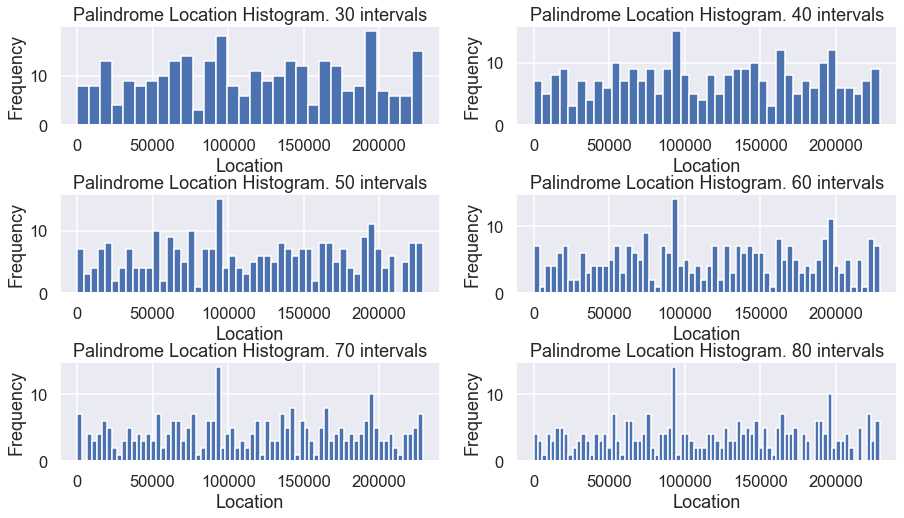

In [25]:
fig, axes = plt.subplots(3, 2, figsize = (15, 8))
plt.subplots_adjust(hspace = 0.7)

for i in range(6):
    row = int(i / 2)
    col = i % 2
    
    axes[row][col].hist(data, bins=(i+3)*10)
    axes[row][col].set_title(f'Palindrome Location Histogram. {(i+3)*10} intervals')
    axes[row][col].set_xlabel('Location')
    axes[row][col].set_ylabel('Frequency')

plt.show()

We can use a **scan statistic** to calculate the probability of seeing a maximum number of $k$ palindromes within a single interval given $m$ intervals. Let $T_m$ be the maximum number of palindromes over $m$ intervals. Let's create the following hypothesis:

- $H_0$: $T_m$ has a distribution of a maximum of independednt Poission($\lambda$) random variables.
- $H_1$: $T_m$ does not have a distribution of a maximum of independednt Poission($\lambda$) random variables.

In the below table we can see the calculated probabilities for $T_{30}$, $T_{40}$, $T_{50}$, $T_{60}$, $T_{70}$, and $T_{80}$. With an appropriately large number of intervals, it is very clear that there is an unusually large cluster of palindromes at around the 93,000th base pair which indicates a potential origin of replication.

In [26]:
# Scan Statistic Calculation
intervals = [30,40,50,60,70,80]
alpha = 0.05
table = pd.DataFrame(columns = ['m','lambda','Interval Width', 'k', 'Interval Location', 'p-value', 'Result'])
for i in range(len(intervals)):
    m = intervals[i]
    interval_width = 229354 // m
    l = pd.cut(data, m).value_counts().mean() # lamdba, which is really x_bar
    k = pd.cut(data, m).value_counts().max() # max number of palindromes in an interval
    interval_loc = pd.cut(data, m).value_counts().idxmax()
    
    total = 0
    for x in range(k):
        total += ( l**x / np.math.factorial(x) ) * np.exp(-l)
    pval = 1 - total**m
    
    if pval < 0.05:
        result = "Reject the null hypothesis"
    else:
        result = "Fail to reject the null hypothesis"
    
    table.loc[i] = intervals[i], l, interval_width, k, interval_loc, pval, result
    
# print(table.to_string(index=False)) # alternate table printing
table.set_index('m')

,lambda,Interval Width,k,Interval Location,p-value,Result
m,,,,,,
30,9.867,7645,19,"(190823.667, 198449.533]",0.172,Fail to reject the null hypothesis
40,7.400,5733,15,"(91687.4, 97406.8]",0.308,Fail to reject the null hypothesis
50,5.920,4587,15,"(91687.4, 96262.92]",0.060,Fail to reject the null hypothesis
60,4.933,3822,14,"(91687.4, 95500.333]",0.036,Reject the null hypothesis
70,4.229,3276,14,"(91687.4, 94955.629]",0.009,Reject the null hypothesis
80,3.700,2866,14,"(91687.4, 94547.1]",0.003,Reject the null hypothesis


Additionally, we can compare our data to random samples from a Poission distribution. Again, let $k$ be the maximum number of palindromes in any interval and let $m$ be the number of intervals. We draw 10,000 random samples from a Poisson distribution given our computed $\lambda$. Then, we determine the 99th percentile for the maximum number of palindromes in a given interval from our random sample and compare it to the value we observe in our real data. Our hypotheses are thus as follows:

- $H_0$: The maximum number of palindromes in an interval follows a Poisson distribution.
- $H_1$: The maximum number of palindromes in an interval does not follow a Poisson distribution.

In the following table we conduct this test for 30, 40, 50, 60, 70, and 80 intervals. For each, we can see that our observed maximum number of palindromes in an interval is larger than the 99th percentile from a Poisson distribution. Therefore it is clear that the largest cluster of palindromes in our data is unusual.

In [27]:
intervals = [30,40,50,60,70,80]
alpha = 0.01
num_samples = 10000
table = pd.DataFrame(columns = ['m','lambda','Interval Width', 'k', '99%', 'Interval Location', 'Result'])
for i in range(len(intervals)):
    m = intervals[i]
    interval_width = 229354 // m
    l = pd.cut(data, m).value_counts().mean() # lamdba, which is really x_bar
    k = pd.cut(data, m).value_counts().max() # max number of palindromes in an interval
    interval_loc = pd.cut(data, m).value_counts().idxmax()
    
    samples = np.random.poisson(l, num_samples)
    percentile95 = np.quantile(samples,1-alpha)
    
    if percentile95 < k:
        result = "Reject the null hypothesis"
    else:
        result = "Fail to reject the null hypothesis"

    table.loc[i] = intervals[i], l, interval_width, k, int(percentile95), interval_loc, result
        
table.set_index('m')

,lambda,Interval Width,k,99%,Interval Location,Result
m,,,,,,
30,9.867,7645,19,18,"(190823.667, 198449.533]",Reject the null hypothesis
40,7.400,5733,15,15,"(91687.4, 97406.8]",Fail to reject the null hypothesis
50,5.920,4587,15,12,"(91687.4, 96262.92]",Reject the null hypothesis
60,4.933,3822,14,11,"(91687.4, 95500.333]",Reject the null hypothesis
70,4.229,3276,14,10,"(91687.4, 94955.629]",Reject the null hypothesis
80,3.700,2866,14,9,"(91687.4, 94547.1]",Reject the null hypothesis


# Conclusion

Following the chi-square tests for a specified distribution, we arrived at the conclusion that the location of the palindromes does follow a uniform distribution. However, the spacings of consecutive, non-overlapping pairs and triple palindromes do not follow an exponential distribution. We had also found that for intervals of length 82, 2797, and 5594, that we do not have sufficient evidence of a poisson distribution for length 2797. For lengths 82, and 5594, we had rejected the null hypothesis in favor of the data not having a Poisson distribution. 

The evidence from the hypothesis testing of the distribution of counts overall seems to indicate that the distribution could plausibly be a poisson of the maximum likelihood estimator. However, given the results of the scan test and our invented test, it seems likely that the data is not the result of uniform chance, as the highest palindrome count cluster seems to be exceptionally unusual.

From this, our analysis finds that there is an unusually large cluster of palindromes at the 93,000th base pair that is a potential origin of replication.


# Theory

## Hypothesis Testing
Hypothesis tests typically have two hypotheses: a null and an alternative hypothesis. The null hypothesis answers yes to the topic in question while the alternative hypothesis says the opposite. Usually, with hypothesis tests, we test at the 95% confidence level and an $\alpha$ of 5%, although it is not required to use these levels.<br><br>
In the event that the calculated p-value for the test statistic is less than the $\alpha$ or if the test statistic is greater than the critical value of the $\chi^2$ distribution with a specified degree of freedom, then we are able to reject the null hypothesis in favor of the alternative hypothesis because we have sufficient evidence that the alternative hypothesis is true. On the other hand, when the p-value is greater than the $\alpha$ level or the test statistic is less than the critical value, we fail to reject the null hypothesis because we do not have sufficient evidence to prove that the alternative hypothesis is correct. <br><br>
When rejecting or failing to reject the null hypothesis, there are errors involved with the decision process. A type I error is described as when we have rejected the null hypothesis when we did not have sufficient evidence to reject it. The probability of a type I error occurring is equal to that of the $\alpha$ level. A type II error is described as when we have failed to reject the null hypothesis when the alternative hypothesis was true. The probability of a type II error occurring is equal to $\beta$. Lastly, power describes the ability to correctly reject the null hypothesis when the alternative hypothesis is actually true and it is calculated as 1 - $\beta$ (the probability of a type II error occurring). Typically, as $\alpha$ grows larger, $\beta$ grows smaller and power increases as well, and vice versa. <br>

## Poisson process

The Poisson process is a model for random occurrences such as waiting time for a bus, arrival time for customers waiting in the queue. This process is distributed with no regularity and follow with the characteristic that:
<br>- rate ($\lambda$) at each hit does not change with each location
<br>- the hit in each region are independent
<br>- one hit can only be in exactly one location
 
Detecting the unusual scatter of the palindromes, the poisson process becomes very useful as the process is a model for uniform random scatter, which represents a good reference model for the DNA strand, as DNA strands are composed of A,C,T, and G. DNA strand can be treated a line that the palindromes are randomly scatter across the line, the location of each palindromes are unique with no overlapped region and the hits of the palindromes in certain interval are independent to other interval. These all align with characteristics for the poisson process.  With the properties of the Poisson process, we can check whether Poisson process is a reference model for the DNA strand data.<br>

## Chi-Square Test

A chi-squared test is used to determine whether a data comes from a specific distribution in categorical variables. This is used to compare the observed frequency versus the expected frequency to check whether the data is statistically significant. The null hypothesis is that the data does follow the specific distribution while the alternative hypothesis is that the data does not follow the specific distribution. We are able reject the null hypothesis if the observed value of the test statistic is larger than the 95% quantile or is the p-value of the test-statistic is greater than the specified alpha level. The data distributions that were tested against the data were uniform distributions, poisson distributions, exponential, and gamma distributions. The formula for the test statistic is
$$\sum\limits_{i = 1}^{m} \frac{(\text{observed} - \text{expected})^2}{\text{expected}}$$
We used the chi square test in question two to compare the observed location and spacing to the theoretical or expected location. When comparing the test statistic, we found the 95 percentile of the chi-square distribution using a degree of freedom of the number of bins minus the number of parameters estimated minus one $\text{df} = m - k - 1$ where $m$ is the number of bins and k is the number of estimated parameters.

## Choice of number of Bins
Typically we want the choice of r to be such that $n \cdot p_j \ge 5$ for all j's where $p_j$ is the probability of a specific data point ending up in a particular bin. Another way that we are able estimate r is by setting it equal to $2 \cdot n ^ {\frac{2}{5}}$. However, when using this result, it may lead to a slightly large choice of r; hence, when using this estimation of r, it depends on a tuning parameter called bandwidth choice. To show that our choice of r is sufficient, performing a sensitivity analysis on the r should not result in significant changes in our results. 

## Poisson Distribution

$$H_0: \text{Counts of the palindromes follow a Poisson Distribution}$$
$$H_A: \text{Counts of the palindromes do not follow a Poisson Distribution}$$
The poisson distribution is used because it closely resembles the data that we are given to work with. The poisson distribution quantifies the counts of hits in fixed intervals of the poisson point process. That is, it is a way of estimating what the occurrence count of an event will be in some given interval. The poisson distribution's probability mass function is 
$$ P(X = k) = \frac{\lambda^k  e^{-\lambda}}{k!} $$ 
<br> We used chi-square testing to determine how well the observed palindrome counts within arbitrarily chosen intervals can be modeled by using a Poisson distribution. These are used to determine whether there are unusual clusters of palindromes, relative to what one would expect if it was determined by random chance alone. We chose to use a wide variety of intervals to ensure the cluster findings are not some strange result of the intervals chosen.<br>

Typically the parameter $\lambda$ is unknown and utilize the maximum likelihood estimator method, where we essentially take the average. $$\hat{\lambda} = \frac{\text{# of palindromes}}{\text{# of intervals of equal length}}$$

The test statistic is: $$T = \sum_{j = 1}^r \frac{(\tilde{V_j} - n\tilde{p_j})^2}{n \tilde{p_j}}$$
Where $\tilde{V_j}$ is the number of intervals with j palindromes, and $n \cdot \tilde{p_j}$ is the total number of intervals times the probability of that a particular intervals has x palindromes.

We reject the null hypothesis if the test statistic T is greater than 95% percentile of the $\chi ^2$ distribution with the degrees of freedom. 

The p-value:  $$P \left [ \text{Theoretical distribution of T under H}_0 \gt \text{the observed value of the test statistic} \right ] = \text{p-value}$$

For the Chi-Square goodness of fit test against a Poisson distribution, we had tried different interval lengths to see whether our results would change. When using a smaller interval length of around 80, we calculated an interval length of around 13.8 and a p-value of 0.008. Hence, we concluded that with a smaller interval length, we would reject the null hypothesis, of the counts of palindromes following a Poisson Distribution. <br>

When we had tested against a larger interval of around 5500, we calculated a large test statistic of 290.637 with an extremely small p-value. Hence, we a larger interval length, we fail to reject the null hypothesis that the counts of palindromes does follow a Poisson Distribution. <br>

By testing different interval lengths, this allows us to see that with a larger interval length, more palindromes are captured in the interval and is more similar to a Poisson distribution. With a smaller interval length, less palindromes are captured in each interval and and the distribution of the counts of palindromes is possibly skewed. Hence, when testing against a Poisson Distribution, we used use a larger interval length. <br>

 
## Uniform Distribution

$$H_0: \text{Locations of the palindromes follow a Uniform Distribution}$$
$$H_A: \text{Locations of the palindromes do not follow a Uniform Distribution}$$

<br>Analyzing the locations of the palindromes, we had split the data up into equal length intervals. Then, because the number of palindromes in each interval is known, we are able to test the data against a uniform distribution. Hence, the expected counts of each interval is the total number of palindromes divided by the number of intervals <br>$$E \left[ V_j \right] = \frac{\text{total number of palindromes}}{\text{the number of intervals}}$$<br> and because we did not need to estimate any parameters, the degree of freedom is the number of intervals minus one, so $$H_0: T \sim \chi^2_{\text{number of equal length intervals} - 1}$$<br>

We had chosen the number of bins to be 20 when testing for a uniform distribution because more than 20 would have resulted in the data being skewed, i.e many of the bins would have been empty or contain very little palindromes. Using 20 bins, we expected to get around 14.8 palindromes in each interval. <br>

Once again, we compare both the test statistic with the 95th percentile of the chi-square distribution and the p-value with the alpha level of 0.05 to determine whether we reject or fail to reject the null hypothesis. <br>

We had calculated a test statistic of around 22.1 with a degree of freedom of 19 because we did not estimate any parameters and a p-value of 0.279. Hence, we had failed to reject the null hypothesis, i.e the location of palindromes does follow a uniform distribution. <br>


## Exponential and Gamma Distribution

When analyzing the spacings between consecutive, consecutive pairs, and consecutive triple palindromes, we use the chi-square test to test again an exponential and gamma distribution because we are analyzing the distance until the next palindrome. In other words, we are measuring the time until the next hit, where the time is the distance and the hit is the location of a palindrome. <br>$$P(\text{distiance between the first and second hits > t}) = P(\text{no palindromes in an interval of length t}) = e^{-\lambda \cdot t}$$ <br>When testing against exponential and gamma distribution, we estimated the parameter of $\lambda$, hence, the degree of freedom is the number of bins minus two. <br>

When we are analyzing the distance between consecutive pairs and triplets of palindromes, we use a goodness of fit test against a Gamma distribution with parameters of 2 or 3 (depending on whether it is pairs or triplets) and lambda as the second parameter. 

Consecutive Palindromes: $H_0: \text{Distance between consecutive palindromes} \sim \text{Exponential Distribution}(\lambda)$

Pairs of Palindromes: $H_0: \text{Distance between consecutive pairs of palindromes} \sim \text{Gamma Distribution}(2, \lambda)$

Triplets of Palindromes: $H_0: \text{Distance between consecutive triplets of palindromes} \sim \text{Gamma Distribution}(3, \lambda)$

When we had carried out the chi-square test for exponential and gamma distributions, we had used a bin length of 50 and counted the number of consecutive pairs and triplets in each bin. For these three tests, we had estimated the parameter of $\lambda = \frac{1}{\bar{x}}$, and hence our degree of freedom was 48. In all three tests, we had calculated a test statistic that was consistently greater than that of the 95% percentile of the $\chi^2$ distribution with degrees of freedom 48. Hence, the locations of consecutive, consecutive pairs, and consecutive triplet palindromes do not follow an exponential, gamma, and gamma distribution, respectively. 


## Scan Statistic
The scan statistic is used to find the unusual cluster. An example of an unusual cluster of palindromes is when a large number of palindromes are really close together. Before finding the unusual cluster we have to decide what an usual cluster will look like first. To do this we have to decide on the maximum number of palindromes per different intervals. It is important to choose the correct length so we are able to identify the palindromes and the number of them in each cluster. 
The first step in this process is to see what the distribution of $T_m$ is under the null hypothesis.
In our case, we want to calculate the probability that the maximum number of palindromes in an interval, given $m$ intervals, is greater than or equal to the max value we observe in our data $a$.
<center> $T_m$ = the maximum number of palindromes over $m$ intervals<br>
$H_0: T_m \sim$ Poisson Distribution$(\lambda)$ </center>
Where under the null hypothesis, $T_m$ has a distribution of a maximum of independent Poisson$(\lambda)$ random variables.
$$P\text{(}T_m \gt a) = P \left [ \text{maximum of independent Poisson}(\lambda) \le a \right]$$
$$= P \left [ \text{all of independent Poisson}(\lambda) \le a  \right ]$$
$$= P \left [ \text{first interval has Poisson}(\lambda) \le a \right ]^m$$
$$= P \left ( \left [ \text{Poisson}(\lambda) = 0 \right ] + \left [ \text{Poisson}(\lambda) = 1 \right ] + \dots + \left [ \text{Poisson}(\lambda) = a \right ] \right ) ^m$$
$$= e^{-\lambda \cdot m} \left [ 1 + \hat{\lambda} + \frac{\hat{\lambda}^2}{2!} + \dots + \frac{\hat{\lambda}^a}{a!}\right ]$$
$$\text{p-value} = \text{P(}T_m \gt \text{observed test statistic}) = 1 - \left [P \left ( T_m < \text{observed test statistic} \right ) \right ]^m$$
$$=1 - \left( e^{- \widehat{\lambda}} \left[ 1 + \widehat{\lambda} + \frac{\widehat{\lambda}^2}{2!} + \dotsc + \frac{\widehat{\lambda}^{\text{observed test statistic}}}{(\text{observed test statistic})!} \right] \right) ^m$$
Where $\hat{\lambda}$ is the Maximum likelihood estimator of parameter $\lambda$ of Poisson Distribution

## Histograms
- Histograms are estimators of the probability density function for a given distribution. Histograms consist of bins that count the number of observations within each interval. The number of bins must be predetermined. 
$$\hat{f}_x (a) = \frac{1}{n} \left( \text{# of observations within} B_l \right) \times \left( \frac{1}{\text{length of bin} B_l} \right)$$
Where $a$ is a specific location in the distribution and $B_l$ is a bin that contains $a$
<br>- Histograms have lower bias the more number of bins are used.
<br>- Histograms provide useful information about the spread of the data and can be used to identify potential outliers, whether the underlying distribution is unimodal/bimodal or symmetric/asymmetric, and what proportion of the distribution lies above or below a certain value.



# References

Leung, M. Y., Choi, K. P., Xia, A., & Chen, L. H. (2005). Nonrandom clusters of palindromes in herpesvirus genomes. Journal of computational biology : a journal of computational molecular cell biology, 12(3), 331–354. https://doi.org/10.1089/cmb.2005.12.331

Leach, D. R., Okely, E. A., & Pinder, D. J. (1997). Repair by recombination of DNA containing a palindromic sequence. *Molecular microbiology, 26*(3), 597-606.

Lamprea-Burgunder, E., Ludin, P., & Mäser, P. (2011). Species-specific typing of DNA based on palindrome frequency patterns. DNA research : an international journal for rapid publication of reports on genes and genomes, 18(2), 117–124. https://doi.org/10.1093/dnares/dsr004

Lockshon, D., & Galloway, D. A. (1988). Sequence and structural requirements of a herpes simplex viral DNA replication origin. *Molecular and Cellular Biology, 8*(10), 4018-4027.

Manicklal, S., Emery, V. C., Lazzarotto, T., Boppana, S. B., & Gupta, R. K. (2013). The "silent" global burden of congenital cytomegalovirus. Clinical microbiology reviews, 26(1), 86–102. https://doi.org/10.1128/CMR.00062-12

Schottstedt, V., Blümel, J., Burger, R., Drosten, C., Gröner, A., Gürtler, L., Heiden, M., Hildebrandt, M., Jansen, B., Montag-Lessing, T., Offergeld, R., Pauli, G., Seitz, R., Schlenkrich, U., Strobel, J., Willkommen, H., & von König, C. H. (2010). Human Cytomegalovirus (HCMV) - Revised. Transfusion medicine and hemotherapy : offizielles Organ der Deutschen Gesellschaft für Transfusionsmedizin und Immunhämatologie, 37(6), 365–375. https://doi.org/10.1159/000322141
